## Problem Statement :
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. The company wants to know

- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.


## Business Goal :
- We need to construct a regression model using regularisation to predict the actual value of the properties and decide whether to invest in them or not to invest in them.
- Determine the optimal value of lambda for ridge and lasso regression.
- This model will then be used by the management to understand how exactly the prices vary with the variables
- They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns.
- The model will be a good way for the management to understand the pricing dynamics of a new market i.e. The Australian market.

In [545]:
# First, let us import the following libraries as these will be essential in constructing the Linear regression model
# Numpy, Pandas are essential for any mathematical problem
import numpy as np
import pandas as pd
from pandas import DataFrame
# Since, we need to make a few visualizations and understand the data better, lets also import those libraries 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# For suppression of warnings
import warnings
warnings.filterwarnings("ignore")
# For regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import RFE
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler


In [546]:
# Importing the database
house_data = pd.read_csv('train.csv')

In [547]:
# Let's  take a look
house_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [548]:
# Let us have a look at the no of rows and collumns
house_data.shape

(1460, 81)

The data has 1460 rows and 81 collumns. We now need to check how many of these do we actually need. We need to make the data well suitable for analysis as raw data is likely to be cranky. Firstly, we need to check for Null values and get rid of those collumns with missing values > 35%

In [549]:
#check Missing values of columns
house_data.isnull().sum()[house_data.isnull().sum()>0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [550]:
# Calculate the percentage of Null values in all the columns
print('The % of Missing Values in each column are as under:')
print(round(house_data.isnull().sum()/len(house_data.index)*100,2).sort_values(ascending=False)[ round(house_data.isnull().sum()/len(house_data.index),2) > 0 ] )

The % of Missing Values in each column are as under:
PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageCond       5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtQual         2.53
BsmtCond         2.53
BsmtFinType1     2.53
MasVnrArea       0.55
MasVnrType       0.55
dtype: float64


Based on the above, we take the following decisions. We observe that PoolQC,MiscFeature,Alley,Fence & FireplaceQu have greater than 35% missing values. We can choose to drop them provided we are also sure that these are really not important variables determining the price. For this, we need to decide based on domain knowledge and experience and consult experts in the field if required.    

Let's briefly understand each of them before dropping them. I am just analysing based on my limited knowledge of real estate prices.  Ideally, an expert's opinion is required. 

a. PoolQC - Pool quality - This maynot be a very important variable in determining the prices. People maynot be that concerned of the quality of pool in their area as it is an ultra luxury facility. So dropping that collumn considering the missing values wouldn't be wrong. 

b. MiscFeature: Miscellaneous feature not covered in other categories - This maynot be very significant in determining the price. So given the large % of missing values, we can drop it

c. Alley: Type of alley access to property- May not be that significant in determining the house price. So dropping that collumn considering the missing values wouldn't be wrong.  

d. Fence: Fence quality- Although a security concern, we assume that it wouldn't be significant enough to affect the prices. 

e. FireplaceQu: Fireplace quality- Fireplace can either be a very basic necessity or maybe an asthetic showpiece depending on the country/ region and climate of the place. Since, in this case, the housing market of australia is being analysed, we can say that quality of fireplace maynot be that significant. Australia does not have an extremely cold climate unlike USA or Canada and so fireplace would just be a luxury there and most likely would not be an important determinant of price. So we can drop it given that so many values are missing. 

Conclusion: Based on the % of missing values and also some business insights, let us drop all the 5 above collumns

For the rest of the comlumns, we shall impute the missing values with suitable methods based on further analysis. 




In [551]:
# We create a new dataframe after dropping the above mentioned collumns
aus_housedata = house_data.drop(columns=['PoolQC','Fence', 'MiscFeature','Alley','FireplaceQu'])

In [552]:
aus_housedata.shape

(1460, 76)

We now need to check if there are any duplicate values and drop them as duplication will distort our analysis. We will check the shape again and be sure

In [553]:
aus_housedata.drop_duplicates(inplace=True)
aus_housedata.shape

(1460, 76)

Since the no of rows remain the same, we can be sure that there are no duplicate values.

Now that, we have eliminated the columns with missing values > 35% and based on some business knowledge of real estate, let us analyse the other columns with missing data < 35% and impute them appropriately. Before doing so, we need to analyse them to select the correct imputation method. 
The columns with < 35% missing values are
- LotFrontage     17.74
- GarageYrBlt      5.55
- GarageCond       5.55
- GarageType       5.55
- GarageFinish     5.55
- GarageQual       5.55
- BsmtFinType2     2.60
- BsmtExposure     2.60
- BsmtQual         2.53
- BsmtCond         2.53
- BsmtFinType1     2.53
- MasVnrArea       0.55
- MasVnrType       0.55

Let us  have a look at the Summary statistics once again after dropping the columns


In [554]:
aus_housedata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


From the above, we observe that LotFrontage and  MasVnrArea have outliers and hence we will impute them with their Median

In [555]:
aus_housedata.MasVnrArea = aus_housedata.MasVnrArea.fillna(aus_housedata.MasVnrArea.median())    

In [556]:
aus_housedata.LotFrontage = aus_housedata.LotFrontage.fillna(aus_housedata.LotFrontage.median()) 

As regards categorical data, we will replace/ impute all the missing values as under:

In [557]:
#replacing Nan values of MasVnrType with None i.e. No Masonary type
aus_housedata.MasVnrType = aus_housedata.MasVnrType.fillna('None')

#replacing Nan values of BsmtQual with NA i.e. No Basement
aus_housedata.BsmtQual = aus_housedata.BsmtQual.fillna('NA')

#replacing Nan values of BsmtCond with NA i.e. No Basement
aus_housedata.BsmtCond = aus_housedata.BsmtCond.fillna('NA')

#impute missing values of Electrical with mode due to categorical column
aus_housedata.Electrical = aus_housedata.Electrical.fillna(aus_housedata.Electrical.mode()[0])    
#replacing Nan values of GarageType with NA i.e. No Garage
aus_housedata.GarageType = aus_housedata.GarageType.fillna('NA')

#replacing Nan values of GarageYrBlt with 0 i.e. No Garage
aus_housedata.GarageYrBlt = aus_housedata.GarageYrBlt.fillna(0)

#replacing Nan values of GarageFinish with NA i.e. No Garage
aus_housedata.GarageFinish = aus_housedata.GarageFinish.fillna('NA')

#replacing Nan values of GarageQual with NA i.e. No Garage
aus_housedata.GarageQual = aus_housedata.GarageQual.fillna('NA')

#replacing Nan values of BsmtExposure with No i.e. No Exposure
aus_housedata.BsmtExposure = aus_housedata.BsmtExposure.fillna('No')

#replacing Nan values of BsmtFinType1 with NA i.e. No Basement
aus_housedata.BsmtFinType1 = aus_housedata.BsmtFinType1.fillna('NA')
#replacing Nan values of BsmtFinType2 with NA i.e. No Basement
aus_housedata.BsmtFinType2 = aus_housedata.BsmtFinType2.fillna('NA')

#replace Nan values of GarageCond with NA i.e. No Garage
aus_housedata.GarageCond = aus_housedata.GarageCond.fillna('NA')


In [558]:
# lET US CHECK MISSING VALUES AGAIN
aus_housedata.isnull().sum()[aus_housedata.isnull().sum()>0]

Series([], dtype: int64)

We need to create some new meaningful columns and drop further columns which have no significant predictive power or need to be modified for easy readability and understanding. We will be performing all those operations now after replacing and imputing missing values

We have 2 columns that is YrSold, YearBuilt but indivdually these would be less meaningful in predicting the price of the house. Rather, we can create a new column of House Age = YrSold- YearBuilt. Subsequently, we may drop YrSold, YearBuilt . 

In [559]:
# Creating a new column indicating the age of the house which can be an important 
# predictor of price. It is a well understood fact that people would prefer new houses to old ones.
aus_housedata['Age_House'] = aus_housedata.YrSold - aus_housedata.YearBuilt

In [560]:
# Now, let us delete YrSold and YearBuilt as these wouldn't be of much use and would unnecessarily complicate the model.  
aus_housedata=aus_housedata.drop(columns=['YrSold', 'YearBuilt'])

Now let us do some further data processing to make it ready for regression analysis.

In [561]:
#let us convert KitchenQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
aus_housedata= aus_housedata.replace({'KitchenQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#let us convert BsmtFinType1 0,1,2,3,4,5,6 -> NA, Unf, LwQ, Rec, BLQ, ALQ, GLQ
aus_housedata= aus_housedata.replace({'BsmtFinType1':{'NA':0,'Unf':1,'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}})

#let us convert HeatingQC 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
aus_housedata= aus_housedata.replace({'HeatingQC':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#let us convert ExterQual 1,2,3,4,5 -> Po, Fa, TA, Gd, Ex
aus_housedata= aus_housedata.replace({'ExterQual':{'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#let us convert BsmtQual 0,1,2,3,4,5 -> NA, Po, Fa, TA, Gd, Ex
aus_housedata= aus_housedata.replace({'BsmtQual':{'NA':0,'Po':1,'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}})

#let us convert BsmtExposure 0,1,2,3,4 -> NA, No, Mn, Av, gd
aus_housedata= aus_housedata.replace({'BsmtExposure':{'NA':0, 'No':1,'Mn':2, 'Av':3, 'Gd':4}})



In [562]:
#convert MSSubClass into object type 
convert_dict = {'MSSubClass':object}
aus_housedata = aus_housedata.astype(convert_dict)

In [563]:
for c in aus_housedata.columns:
    if aus_housedata[c].dtype == np.object :
        print(c)
        print(aus_housedata[c].value_counts(normalize=True))

MSSubClass
20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64
MSZoning
RL         0.788356
RM         0.149315
FV         0.044521
RH         0.010959
C (all)    0.006849
Name: MSZoning, dtype: float64
Street
Pave    0.99589
Grvl    0.00411
Name: Street, dtype: float64
LotShape
Reg    0.633562
IR1    0.331507
IR2    0.028082
IR3    0.006849
Name: LotShape, dtype: float64
LandContour
Lvl    0.897945
Bnk    0.043151
HLS    0.034247
Low    0.024658
Name: LandContour, dtype: float64
Utilities
AllPub    0.999315
NoSeWa    0.000685
Name: Utilities, dtype: float64
LotConfig
Inside     0.720548
Corner     0.180137
CulDSac    0.064384
FR2        0.032192
FR3        0.002740
Name: LotConfig, dtype: float64
LandSlope
Gtl    0.946575
Mod    0.044521
Sev    0.008904
Name: LandSlop

In [564]:
#Let us Drop the columns which have more than 80% bias data
aus_housedata=aus_housedata.drop(columns=['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'BsmtCond'
                                    ,'Heating', 'CentralAir', 'Electrical', 'Functional', 'GarageQual', 'GarageCond'
                                    , 'PavedDrive', 'Condition1', 'BldgType', 'ExterCond', 'BsmtFinType2', 'SaleType'
                                    , 'SaleCondition'])

In [565]:
# Now lets have a look at Object type collumns

In [566]:
#Get all object type columns
object_columns = []
for c in aus_housedata.columns:
    if aus_housedata[c].dtype == np.object:
        object_columns.append(c)
print(object_columns)

['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'GarageType', 'GarageFinish']


Let us now create some dummy variables

In [567]:
# create dummy variable for Condition1
MSSubClass_df = pd.get_dummies(aus_housedata['MSSubClass'],drop_first=True, prefix='MSSubClass')
#concat MSSubClass_df with main house_data df
aus_housedata = pd.concat([aus_housedata,MSSubClass_df],axis=1)
aus_housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,...,1,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,...,0,0,0,0,0,0,0,0,0,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,...,1,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,...,0,1,0,0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,...,1,0,0,0,0,0,0,0,0,0


In [568]:
#create dummy variable for weathersit
MSZoning_df = pd.get_dummies(aus_housedata['MSZoning'],drop_first=True, prefix='MSZoning')
MSZoning_df.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [569]:
#concat MSZoning_df with main house_data df
aus_housedata = pd.concat([aus_housedata,MSZoning_df],axis=1)
aus_housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,...,0,0,0,0,0,0,0,0,1,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,...,0,0,0,0,0,0,0,0,1,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,...,0,0,0,0,0,0,0,0,1,0
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,...,0,0,0,0,0,0,0,0,1,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,...,0,0,0,0,0,0,0,0,1,0


In [570]:
#create dummy variable for LotShape
LotShape_df = pd.get_dummies(aus_housedata['LotShape'],drop_first=True, prefix='LotShape')

In [571]:
#concat LotShape_df with main house_data df
aus_housedata = pd.concat([aus_housedata,LotShape_df],axis=1)
aus_housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,...,0,0,0,0,0,1,0,0,0,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,...,0,0,0,0,0,1,0,0,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,...,0,0,0,0,0,1,0,0,0,0
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,...,0,0,0,0,0,1,0,0,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,...,0,0,0,0,0,1,0,0,0,0


In [572]:
#create dummy variable for LotConfig
LotConfig_df = pd.get_dummies(aus_housedata['LotConfig'],drop_first=True, prefix='LotConfig')

In [573]:
#concat LotConfig_df with main house_data df
aus_housedata = pd.concat([aus_housedata,LotConfig_df],axis=1)
aus_housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,...,0,1,0,0,0,1,0,0,0,1
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,...,0,1,0,0,0,1,0,1,0,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,...,0,1,0,0,0,0,0,0,0,1
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,...,0,1,0,0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,...,0,1,0,0,0,0,0,1,0,0


In [574]:
#create dummy variable for LotShape
Neighborhood_df = pd.get_dummies(aus_housedata['Neighborhood'],drop_first=True, prefix='Neighborhood')

In [575]:
#concat LotConfig_df with main house_data df
aus_housedata = pd.concat([aus_housedata,Neighborhood_df],axis=1)
aus_housedata.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,...,0,0,0,0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,...,0,0,0,0,0,0,0,0,0,1
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,...,0,0,0,0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,...,0,0,0,0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,...,1,0,0,0,0,0,0,0,0,0


Let's do the same for other categorical variables

In [576]:
#create dummy variable for LotShape
Neighborhood_df = pd.get_dummies(aus_housedata['Neighborhood'],drop_first=True, prefix='Neighborhood')
#concat LotConfig_df with main aus_housedata df
aus_housedata = pd.concat([aus_housedata,Neighborhood_df],axis=1)


#create dummy variable for HouseStyle
HouseStyle_df = pd.get_dummies(aus_housedata['HouseStyle'],drop_first=True, prefix='HouseStyle')
#concat HouseStyle_df with main aus_housedata df
aus_housedata = pd.concat([aus_housedata,HouseStyle_df],axis=1)


#create dummy variable for RoofStyle
RoofStyle_df = pd.get_dummies(aus_housedata['RoofStyle'],drop_first=True, prefix='RoofStyle')
#concat RoofStyle_df with main aus_housedata df
aus_housedata = pd.concat([aus_housedata,RoofStyle_df],axis=1)


#create dummy variable for Exterior1st
Exterior1st_df = pd.get_dummies(aus_housedata['Exterior1st'],drop_first=True, prefix='Exterior1st')
#concat Exterior1st_df with main aus_housedata df
aus_housedata = pd.concat([aus_housedata,Exterior1st_df],axis=1)


#create dummy variable for Exterior2nd
Exterior2nd_df = pd.get_dummies(aus_housedata['Exterior2nd'],drop_first=True, prefix='Exterior2nd')
#concat Exterior2nd_df with main aus_housedata df
aus_housedata = pd.concat([aus_housedata,Exterior2nd_df],axis=1)


#create dummy variable for MasVnrType
MasVnrType_df = pd.get_dummies(aus_housedata['MasVnrType'],drop_first=True, prefix='MasVnrType')
#concat MasVnrType_df with main aus_housedata df
aus_housedata = pd.concat([aus_housedata,MasVnrType_df],axis=1)


#create dummy variable for Foundation
Foundation_df = pd.get_dummies(aus_housedata['Foundation'],drop_first=True, prefix='Foundation')
#concat Foundation_df with main aus_housedata df
aus_housedata = pd.concat([aus_housedata,Foundation_df],axis=1)


#create dummy variable for GarageType
GarageType_df = pd.get_dummies(aus_housedata['GarageType'],drop_first=True, prefix='GarageType')
#concat GarageType_df with main aus_housedata df
aus_housedata = pd.concat([aus_housedata,GarageType_df],axis=1)


#create dummy variable for GarageFinish
GarageFinish_df = pd.get_dummies(aus_housedata['GarageFinish'],drop_first=True, prefix='GarageFinish')
#concat GarageFinish_df with main aus_housedata df
aus_housedata = pd.concat([aus_housedata,GarageFinish_df],axis=1)
aus_housedata.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
0,1,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,...,0,1,0,0,0,0,0,0,1,0
1,2,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,...,0,1,0,0,0,0,0,0,1,0
2,3,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,...,0,1,0,0,0,0,0,0,1,0
3,4,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,...,0,0,0,0,0,1,0,0,0,1
4,5,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,...,0,1,0,0,0,0,0,0,1,0


Now, let us delete the original categorical variables column before we prepare data for modelling

In [577]:
#Drop categorical variables after ceating dummy varaibles and also dropping ID column
aus_housedata=aus_housedata.drop(columns=['Id','MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle'
                                    , 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
                                    'GarageType', 'GarageFinish'])


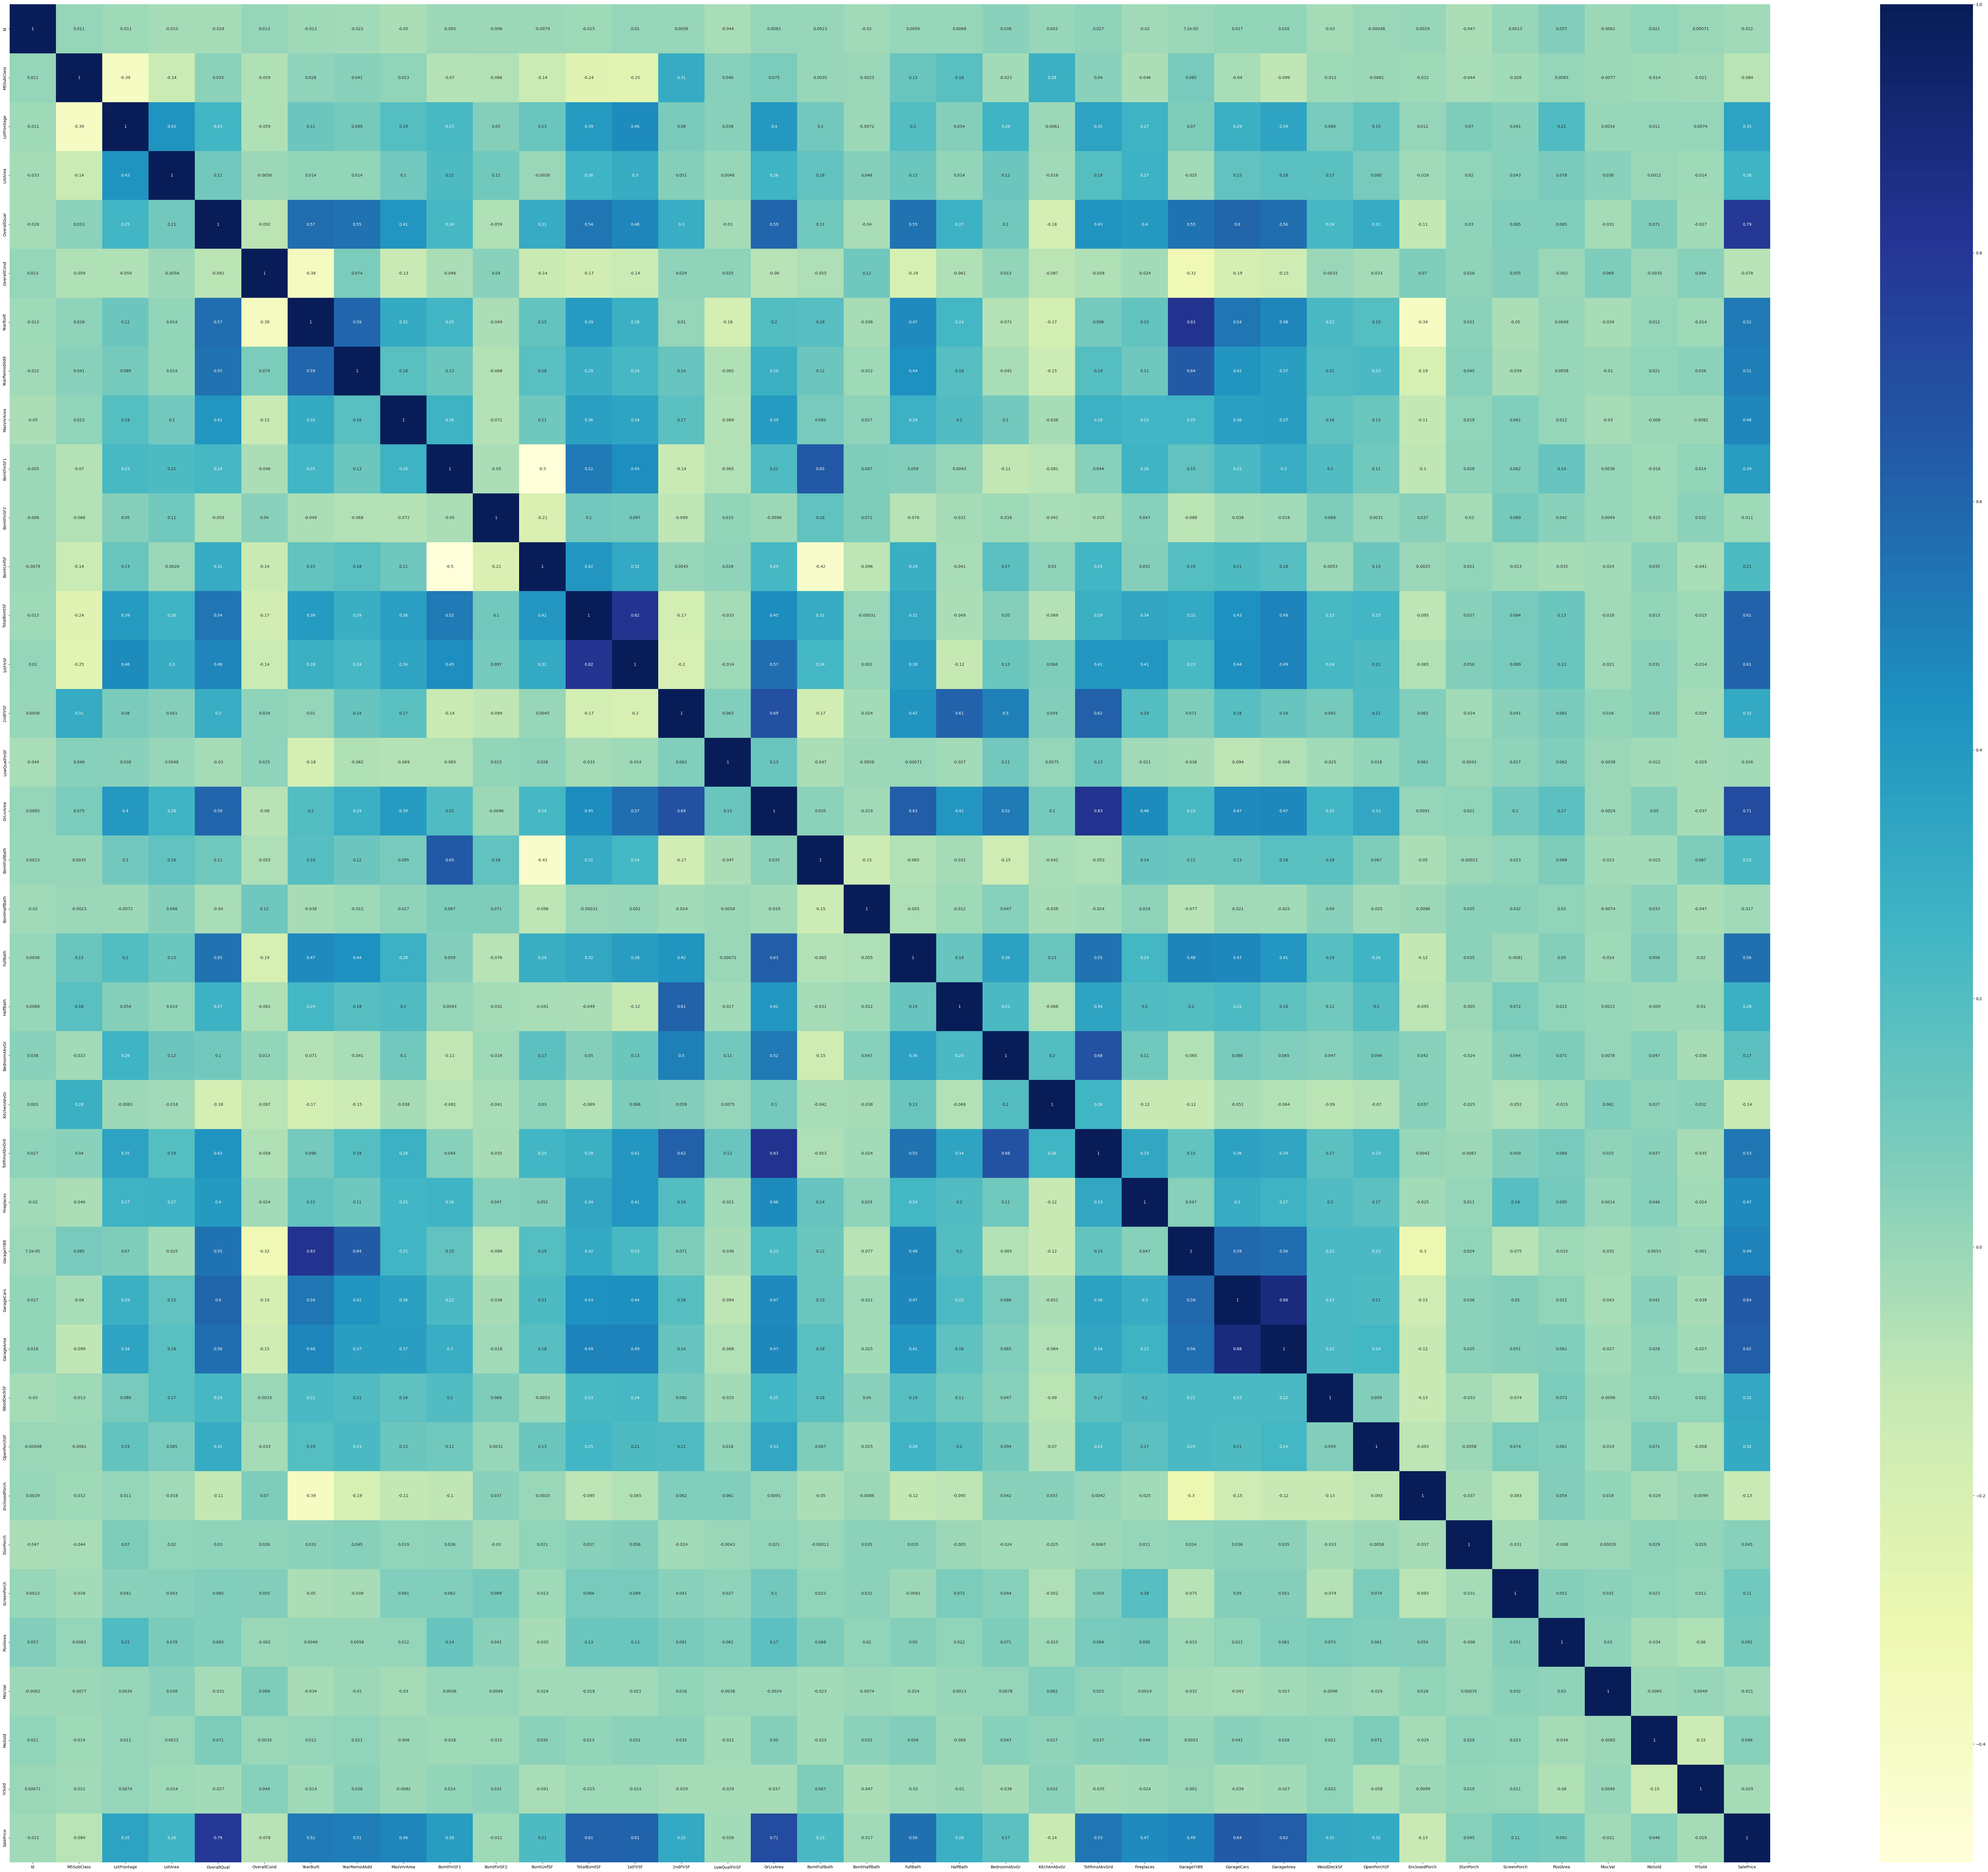

In [578]:
#checking the correaltion with new columns with heatmap
plt.figure(figsize=(100,85))
sns.heatmap(house_data.corr(), annot =True, cmap="YlGnBu")
plt.show()

# Preparation of data for modelling

In [579]:
df_train,df_test = train_test_split(aus_housedata,train_size=0.70,random_state=100)
print(df_train.shape)
print(df_test.shape)

(1021, 172)
(439, 172)


In [580]:
# Lets relook at the training data
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,69.569050,10489.964740,6.093046,5.580803,1984.984329,104.489716,3.399608,3.479922,1.691479,3.593536,...,0.001959,0.589618,0.011753,0.063663,0.006856,0.269344,0.055828,0.055828,0.278159,0.421156
std,22.090553,10308.062725,1.399636,1.092121,20.604962,187.341089,0.571342,0.900348,1.058956,2.114914,...,0.044237,0.492144,0.107826,0.244271,0.082557,0.443836,0.229701,0.229701,0.448312,0.493986
min,21.000000,1477.000000,1.000000,1.000000,1950.000000,0.000000,2.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,7449.000000,5.000000,5.000000,1967.000000,0.000000,3.000000,3.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,69.000000,9505.000000,6.000000,5.000000,1994.000000,0.000000,3.000000,4.000000,1.000000,4.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,78.000000,11512.000000,7.000000,6.000000,2004.000000,158.000000,4.000000,4.000000,3.000000,6.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5.000000,5.000000,4.000000,6.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Let us now rescale the numeric values. Since, we have a lot of dummy and categorical variables, we will use the min max scaler. This is to ensure better interpretability.

In [581]:

scaler = StandardScaler()

#create list of numeric variables
num_vars = ['LotFrontage','LotArea','OverallQual','OverallCond','YearRemodAdd','MasVnrArea', 'ExterQual', 'BsmtQual'
            , 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'TotalBsmtSF'
           , 'HeatingQC', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath'
            , 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces'
           ,  'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
           , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'Age_House']

#fit on data
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
318,0.925326,-0.057261,0.648310,-0.532073,0.389207,0.809137,1.051361,0.577925,2.181065,1.138412,...,0,1,0,0,0,0,0,0,1,0
239,-0.795709,-0.169753,-0.066511,-1.448170,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.753845,...,0,0,0,0,0,1,0,0,0,1
986,-0.478677,-0.502762,-0.066511,2.216221,0.874765,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,...,0,1,0,0,0,0,0,0,0,1
1416,-0.433386,0.082504,-1.496155,0.384025,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,...,0,0,0,0,0,1,0,0,0,1
390,-0.886290,-0.202365,-0.781333,2.216221,-1.698692,-0.558025,-0.699764,-0.533302,-0.653302,-0.280781,...,0,0,0,0,0,1,0,0,0,1


In [582]:
df_train.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,1.021000e+03,...,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,-2.370506e-17,-9.108912e-17,-2.217184e-16,1.241797e-16,-8.375061e-16,-9.416779e-17,4.334328e-16,2.710858e-16,1.628907e-16,1.346186e-16,...,0.001959,0.589618,0.011753,0.063663,0.006856,0.269344,0.055828,0.055828,0.278159,0.421156
std,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,1.000490e+00,...,0.044237,0.492144,0.107826,0.244271,0.082557,0.443836,0.229701,0.229701,0.448312,0.493986
min,-2.199712e+00,-8.747892e-01,-3.640619e+00,-4.196464e+00,-1.698692e+00,-5.580245e-01,-2.450888e+00,-3.866981e+00,-6.533017e-01,-1.699973e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-4.333861e-01,-2.951529e-01,-7.813329e-01,-5.320725e-01,-8.732432e-01,-5.580245e-01,-6.997636e-01,-5.333016e-01,-6.533017e-01,-1.226909e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.577250e-02,-9.559968e-02,-6.651132e-02,-5.320725e-01,4.377630e-01,-5.580245e-01,-6.997636e-01,5.779248e-01,-6.533017e-01,1.922837e-01,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.818411e-01,9.919770e-02,6.483103e-01,3.840254e-01,9.233208e-01,2.857702e-01,1.051361e+00,5.779248e-01,1.236276e+00,1.138412e+00,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.102509e+01,1.987332e+01,2.792775e+00,3.132319e+00,1.214656e+00,7.986733e+00,2.802485e+00,1.689151e+00,2.181065e+00,1.138412e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now let us build the linear model

In [583]:
#create X_train,y_train 
#cnt is out Target/dependent Variable
y_train = df_train.pop('SalePrice')
X_train = df_train

In [584]:
X_train.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       ...
       'Foundation_Wood', 'GarageType_Attchd', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_NA', 'GarageFinish_NA', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=171)

Since, we have many features, it is definitely not wise to manually eliminate the features. So we would prefer using recursive feature elimination to select the features. Let us start with 35 arbitary number of features.  Then we will use statsmodels library to build models using the shortlisted features and double check the same using VIF and p values.Now let us perform RFE (Recursive feature elimination) and select the top 35 variables only

In [585]:
#Running RFE with the out variables equals to 35
lm = LinearRegression()
lm.fit(X_train, y_train)



LinearRegression()

In [586]:
rfe = RFE(estimator=lm,n_features_to_select=35)
rfe = rfe.fit(X_train, y_train)

In [587]:
#List of variables selected in top 35 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', False, 89),
 ('LotArea', False, 61),
 ('OverallQual', True, 1),
 ('OverallCond', False, 62),
 ('YearRemodAdd', False, 130),
 ('MasVnrArea', False, 66),
 ('ExterQual', False, 104),
 ('BsmtQual', False, 87),
 ('BsmtExposure', True, 1),
 ('BsmtFinType1', False, 63),
 ('BsmtFinSF1', False, 23),
 ('BsmtFinSF2', False, 43),
 ('BsmtUnfSF', False, 42),
 ('TotalBsmtSF', False, 41),
 ('HeatingQC', False, 124),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 37),
 ('GrLivArea', False, 30),
 ('BsmtFullBath', False, 65),
 ('BsmtHalfBath', False, 118),
 ('FullBath', False, 95),
 ('HalfBath', False, 135),
 ('BedroomAbvGr', False, 131),
 ('KitchenAbvGr', False, 54),
 ('KitchenQual', False, 5),
 ('TotRmsAbvGrd', False, 133),
 ('Fireplaces', False, 86),
 ('GarageYrBlt', True, 1),
 ('GarageCars', False, 125),
 ('GarageArea', False, 84),
 ('WoodDeckSF', False, 101),
 ('OpenPorchSF', False, 126),
 ('EnclosedPorch', False, 136),
 ('3SsnPorch', False, 91),
 ('ScreenP

In [588]:
#selected columns from rfe
col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'GarageYrBlt',
       'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180', 'LotShape_IR3',
       'Neighborhood_Blueste', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_IDOTRR', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'HouseStyle_1Story', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_CemntBd', 'Exterior1st_Stucco', 'Exterior2nd_AsphShn',
       'Exterior2nd_Brk Cmn', 'Exterior2nd_BrkFace', 'Exterior2nd_CmentBd',
       'GarageType_NA', 'GarageFinish_NA'],
      dtype='object')

In [589]:
#Deletedcolumns from rfe
X_train.columns[~rfe.support_]

Index(['LotFrontage', 'LotArea', 'OverallCond', 'YearRemodAdd', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood',
       'GarageType_Attchd', 'GarageType_Basment', 'GarageType_BuiltIn',
       'GarageType_CarPort', 'GarageType_Detchd', 'GarageFinish_RFn',
       'GarageFinish_Unf'],
      dtype='object', length=136)

#### Let us start building our model based on RFE selected columns

In [590]:
#creation of X_train with RFE selected columns
X_train_rfe = X_train[col]

In [591]:
#adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [592]:
#create first RFE model and running the linear Model
lm = sm.OLS(y_train,X_train_rfe).fit()  

In [593]:
#Get the Summary of Linear Model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     173.2
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:30:42   Log-Likelihood:                -12074.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     993   BIC:                         2.434e+04
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.272e+05   6417.480     19.826      0.000    1.15e+05     1.4e+05
OverallQual           2.509e+04   1750.408     14.335      0.000    2.17e+04    2.85e+04
BsmtExposure          1.351e+04   1208.402     11.180      0.000    1.11e+04    1.59e+04
1stFlrSF               2.25e+04   1498.274     15.016      0.000    1.96e+04    2.54e+04
2ndFlrSF              2.778e+04   1939.092     14.324      0.000     2.4e+04    3.16e+04
GarageYrBlt           1.569e+05   2.63e+04      5.967      0.000    1.05e+05    2.08e+05
MSSubClass_120       -2.767e+04   4864.020     -5.689      0.000   -3.72e+04   -1.81e+04
MSSubClass_160       -3.496e+04   5980.063     -5.845      0.000   -4.67e+04   -2.32e+04
MSSubClass_180       -1.608e+04   1.52e+04     -1.056      0.291    -4.6e+04    1.38e+04
LotShape_IR3          -2.32e+04   1.15e+04     -2.025      0.043   -4.57e+04    -719.570
Neighborhood_Blueste  1.231e+04    1.7e+04      0.723      0.470   -2.11e+04    4.57e+04
Neighborhood_Blueste  1.231e+04    1.7e+04      0.723      0.470   -2.11e+04    4.57e+04
Neighborhood_Crawfor  8335.3162   1578.781      5.280      0.000    5237.185    1.14e+04
Neighborhood_Crawfor  8335.3162   1578.781      5.280      0.000    5237.185    1.14e+04
Neighborhood_Edwards -5527.3737   2137.566     -2.586      0.010   -9722.039   -1332.709
Neighborhood_Edwards -5527.3737   2137.566     -2.586      0.010   -9722.039   -1332.709
Neighborhood_IDOTRR  -5970.4442   3289.164     -1.815      0.070   -1.24e+04     484.066
Neighborhood_IDOTRR  -5970.4442   3289.164     -1.815      0.070   -1.24e+04     484.066
Neighborhood_NoRidge  1.623e+04   1612.867     10.061      0.000    1.31e+04    1.94e+04
Neighborhood_NoRidge  1.623e+04   1612.867     10.061      0.000    1.31e+04    1.94e+04
Neighborhood_NridgHt  1.481e+04   1314.868     11.263      0.000    1.22e+04    1.74e+04
Neighborhood_NridgHt  1.481e+04   1314.868     11.263      0.000    1.22e+04    1.74e+04
Neighborhood_Somerst  7115.3094   1287.107      5.528      0.000    4589.548    9641.071
Neighborhood_Somerst  7115.3094   1287.107      5.528      0.000    4589.548    9641.071
Neighborhood_StoneBr  1.038e+04   2516.487      4.126      0.000    5443.793    1.53e+04
Neighborhood_StoneBr  1.038e+04   2516.487      4.126      0.000    5443.793    1.53e+04
Neighborhood_Veenker  7726.8867   2641.186      2.926      0.004    2543.940    1.29e+04
Neighborhood_Veenker  7726.8867   2641.186      2.926      0.004    2543.940    1.29e+04
Neighborhood_Crawfor  8335.3162   1578.781      5.280      0.000    5237.185    1.14e+04
Neighborhood_Crawfor  8335.3162   1578.781      5.280      0.000    5237.185    1.14e+04
Neighborhood_NoRidge  1.623e+04   1612.867     10.061      0.000    1.31e+04    1.94e+04
Neighborhood_NoRidge  1.623e+04   1612.867     10.061    

In [594]:
#checking VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
25,Neighborhood_StoneBr,inf
33,Neighborhood_NridgHt,inf
24,Neighborhood_StoneBr,inf
26,Neighborhood_Veenker,inf
27,Neighborhood_Veenker,inf
28,Neighborhood_Crawfor,inf
29,Neighborhood_Crawfor,inf
30,Neighborhood_NoRidge,inf
31,Neighborhood_NoRidge,inf
32,Neighborhood_NridgHt,inf


In [595]:
# Let us drop Neighborhood_Blueste since it has both a high p value as well as HIGH VIF
X_train_new= X_train_rfe.drop(['Neighborhood_Blueste'],axis=1)
X_train_new.columns


Index(['const', 'OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF',
       'GarageYrBlt', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180',
       'LotShape_IR3', 'Neighborhood_Crawfor', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_IDOTRR', 'Neighborhood_NoRidge', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Neighborhood_Veenker', 'Neighborhood_Crawfor',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Neighborhood_Veenker', 'HouseStyle_1Story',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CemntBd',


In [596]:
# Rebuilding model
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
# Check summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     180.0
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:30:43   Log-Likelihood:                -12074.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     994   BIC:                         2.434e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.272e+05   6415.924     19.832      0.000    1.15e+05     1.4e+05
OverallQual            2.51e+04   1749.977     14.341      0.000    2.17e+04    2.85e+04
BsmtExposure          1.351e+04   1208.105     11.185      0.000    1.11e+04    1.59e+04
1stFlrSF              2.251e+04   1497.854     15.027      0.000    1.96e+04    2.54e+04
2ndFlrSF              2.782e+04   1937.802     14.355      0.000     2.4e+04    3.16e+04
GarageYrBlt           1.568e+05   2.63e+04      5.965      0.000    1.05e+05    2.08e+05
MSSubClass_120       -2.765e+04   4862.736     -5.685      0.000   -3.72e+04   -1.81e+04
MSSubClass_160       -3.427e+04   5903.689     -5.805      0.000   -4.59e+04   -2.27e+04
MSSubClass_180       -1.596e+04   1.52e+04     -1.048      0.295   -4.58e+04    1.39e+04
LotShape_IR3         -2.324e+04   1.15e+04     -2.029      0.043   -4.57e+04    -765.916
Neighborhood_Crawfor  8327.3669   1578.364      5.276      0.000    5230.058    1.14e+04
Neighborhood_Crawfor  8327.3669   1578.364      5.276      0.000    5230.058    1.14e+04
Neighborhood_Edwards -5551.8418   2136.786     -2.598      0.010   -9744.971   -1358.713
Neighborhood_Edwards -5551.8418   2136.786     -2.598      0.010   -9744.971   -1358.713
Neighborhood_IDOTRR  -5966.6036   3288.371     -1.814      0.070   -1.24e+04     486.343
Neighborhood_IDOTRR  -5966.6036   3288.371     -1.814      0.070   -1.24e+04     486.343
Neighborhood_NoRidge  1.621e+04   1612.263     10.053      0.000     1.3e+04    1.94e+04
Neighborhood_NoRidge  1.621e+04   1612.263     10.053      0.000     1.3e+04    1.94e+04
Neighborhood_NridgHt  1.479e+04   1314.239     11.252      0.000    1.22e+04    1.74e+04
Neighborhood_NridgHt  1.479e+04   1314.239     11.252      0.000    1.22e+04    1.74e+04
Neighborhood_Somerst  7058.7912   1284.425      5.496      0.000    4538.295    9579.288
Neighborhood_Somerst  7058.7912   1284.425      5.496      0.000    4538.295    9579.288
Neighborhood_StoneBr  1.036e+04   2515.651      4.117      0.000    5420.683    1.53e+04
Neighborhood_StoneBr  1.036e+04   2515.651      4.117      0.000    5420.683    1.53e+04
Neighborhood_Veenker  7719.2066   2640.532      2.923      0.004    2537.551    1.29e+04
Neighborhood_Veenker  7719.2066   2640.532      2.923      0.004    2537.551    1.29e+04
Neighborhood_Crawfor  8327.3669   1578.364      5.276      0.000    5230.058    1.14e+04
Neighborhood_Crawfor  8327.3669   1578.364      5.276      0.000    5230.058    1.14e+04
Neighborhood_NoRidge  1.621e+04   1612.263     10.053      0.000     1.3e+04    1.94e+04
Neighborhood_NoRidge  1.621e+04   1612.263     10.053      0.000     1.3e+04    1.94e+04
Neighborhood_NridgHt  1.479e+04   1314.239     11.252      0.000    1.22e+04    1.74e+04
Neighborhood_NridgHt  1.479e+04   1314.239     11.252    

In [597]:
#checking VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
24,Neighborhood_Veenker,inf
21,Neighborhood_Somerst,inf
23,Neighborhood_StoneBr,inf
25,Neighborhood_Veenker,inf
26,Neighborhood_Crawfor,inf
27,Neighborhood_Crawfor,inf
28,Neighborhood_NoRidge,inf
29,Neighborhood_NoRidge,inf
30,Neighborhood_NridgHt,inf
31,Neighborhood_NridgHt,inf


In [598]:
# Next let's drop Exterior2nd_AsphShn and rebuild the model
X_train_new = X_train_new.drop(['Exterior2nd_AsphShn'],axis=1)
X_train_new.columns



Index(['const', 'OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF',
       'GarageYrBlt', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180',
       'LotShape_IR3', 'Neighborhood_Crawfor', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Edwards', 'Neighborhood_IDOTRR',
       'Neighborhood_IDOTRR', 'Neighborhood_NoRidge', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Neighborhood_Veenker', 'Neighborhood_Crawfor',
       'Neighborhood_Crawfor', 'Neighborhood_NoRidge', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_NridgHt', 'Neighborhood_Somerst',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_StoneBr',
       'Neighborhood_Veenker', 'Neighborhood_Veenker', 'HouseStyle_1Story',
       'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_CemntBd',


In [599]:
# Rebuilding model
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
# Check summary
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     180.0
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:30:43   Log-Likelihood:                -12074.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     994   BIC:                         2.434e+04
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.272e+05   6415.924     19.832      0.000    1.15e+05     1.4e+05
OverallQual            2.51e+04   1749.977     14.341      0.000    2.17e+04    2.85e+04
BsmtExposure          1.351e+04   1208.105     11.185      0.000    1.11e+04    1.59e+04
1stFlrSF              2.251e+04   1497.854     15.027      0.000    1.96e+04    2.54e+04
2ndFlrSF              2.782e+04   1937.802     14.355      0.000     2.4e+04    3.16e+04
GarageYrBlt           1.568e+05   2.63e+04      5.965      0.000    1.05e+05    2.08e+05
MSSubClass_120       -2.765e+04   4862.736     -5.685      0.000   -3.72e+04   -1.81e+04
MSSubClass_160       -3.427e+04   5903.689     -5.805      0.000   -4.59e+04   -2.27e+04
MSSubClass_180       -1.596e+04   1.52e+04     -1.048      0.295   -4.58e+04    1.39e+04
LotShape_IR3         -2.324e+04   1.15e+04     -2.029      0.043   -4.57e+04    -765.916
Neighborhood_Crawfor  8327.3669   1578.364      5.276      0.000    5230.058    1.14e+04
Neighborhood_Crawfor  8327.3669   1578.364      5.276      0.000    5230.058    1.14e+04
Neighborhood_Edwards -5551.8418   2136.786     -2.598      0.010   -9744.971   -1358.713
Neighborhood_Edwards -5551.8418   2136.786     -2.598      0.010   -9744.971   -1358.713
Neighborhood_IDOTRR  -5966.6036   3288.371     -1.814      0.070   -1.24e+04     486.343
Neighborhood_IDOTRR  -5966.6036   3288.371     -1.814      0.070   -1.24e+04     486.343
Neighborhood_NoRidge  1.621e+04   1612.263     10.053      0.000     1.3e+04    1.94e+04
Neighborhood_NoRidge  1.621e+04   1612.263     10.053      0.000     1.3e+04    1.94e+04
Neighborhood_NridgHt  1.479e+04   1314.239     11.252      0.000    1.22e+04    1.74e+04
Neighborhood_NridgHt  1.479e+04   1314.239     11.252      0.000    1.22e+04    1.74e+04
Neighborhood_Somerst  7058.7912   1284.425      5.496      0.000    4538.295    9579.288
Neighborhood_Somerst  7058.7912   1284.425      5.496      0.000    4538.295    9579.288
Neighborhood_StoneBr  1.036e+04   2515.651      4.117      0.000    5420.683    1.53e+04
Neighborhood_StoneBr  1.036e+04   2515.651      4.117      0.000    5420.683    1.53e+04
Neighborhood_Veenker  7719.2066   2640.532      2.923      0.004    2537.551    1.29e+04
Neighborhood_Veenker  7719.2066   2640.532      2.923      0.004    2537.551    1.29e+04
Neighborhood_Crawfor  8327.3669   1578.364      5.276      0.000    5230.058    1.14e+04
Neighborhood_Crawfor  8327.3669   1578.364      5.276      0.000    5230.058    1.14e+04
Neighborhood_NoRidge  1.621e+04   1612.263     10.053      0.000     1.3e+04    1.94e+04
Neighborhood_NoRidge  1.621e+04   1612.263     10.053      0.000     1.3e+04    1.94e+04
Neighborhood_NridgHt  1.479e+04   1314.239     11.252      0.000    1.22e+04    1.74e+04
Neighborhood_NridgHt  1.479e+04   1314.239     11.252    

In [600]:
#checking VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
24,Neighborhood_Veenker,inf
30,Neighborhood_NridgHt,inf
22,Neighborhood_StoneBr,inf
23,Neighborhood_StoneBr,inf
25,Neighborhood_Veenker,inf
26,Neighborhood_Crawfor,inf
27,Neighborhood_Crawfor,inf
28,Neighborhood_NoRidge,inf
29,Neighborhood_NoRidge,inf
31,Neighborhood_NridgHt,inf


Let us drop Neighborhood_IDOTRR since it has both high p value and high VIF

In [601]:
# Next let's drop Exterior2nd_AsphShn and rebuild the model
X_train_new = X_train_new.drop(['Neighborhood_IDOTRR'],axis=1)
X_train_new.columns



Index(['const', 'OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF',
       'GarageYrBlt', 'MSSubClass_120', 'MSSubClass_160', 'MSSubClass_180',
       'LotShape_IR3', 'Neighborhood_Crawfor', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Edwards', 'Neighborhood_NoRidge',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Neighborhood_Veenker',
       'Neighborhood_Crawfor', 'Neighborhood_Crawfor', 'Neighborhood_NoRidge',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_NridgHt',
       'Neighborhood_Somerst', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Neighborhood_Veenker',
       'HouseStyle_1Story', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_CemntBd', 'Exterior1st_Stucco', 'Exterior2nd_Brk Cmn',
 

In [602]:
# Rebuilding model
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
# Check summary
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     186.6
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:30:43   Log-Likelihood:                -12076.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     995   BIC:                         2.433e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.256e+05   6358.313     19.752      0.000    1.13e+05    1.38e+05
OverallQual           2.522e+04   1750.644     14.407      0.000    2.18e+04    2.87e+04
BsmtExposure          1.346e+04   1209.083     11.129      0.000    1.11e+04    1.58e+04
1stFlrSF              2.272e+04   1494.957     15.199      0.000    1.98e+04    2.57e+04
2ndFlrSF              2.802e+04   1936.684     14.470      0.000    2.42e+04    3.18e+04
GarageYrBlt           1.613e+05   2.62e+04      6.157      0.000     1.1e+05    2.13e+05
MSSubClass_120       -2.762e+04   4868.309     -5.673      0.000   -3.72e+04   -1.81e+04
MSSubClass_160       -3.365e+04   5900.540     -5.703      0.000   -4.52e+04   -2.21e+04
MSSubClass_180       -1.444e+04   1.52e+04     -0.949      0.343   -4.43e+04    1.54e+04
LotShape_IR3         -2.342e+04   1.15e+04     -2.043      0.041   -4.59e+04    -925.640
Neighborhood_Crawfor  8429.5008   1579.176      5.338      0.000    5330.602    1.15e+04
Neighborhood_Crawfor  8429.5008   1579.176      5.338      0.000    5330.602    1.15e+04
Neighborhood_Edwards -5197.3251   2130.284     -2.440      0.015   -9377.690   -1016.961
Neighborhood_Edwards -5197.3251   2130.284     -2.440      0.015   -9377.690   -1016.961
Neighborhood_NoRidge  1.612e+04   1613.441      9.993      0.000     1.3e+04    1.93e+04
Neighborhood_NoRidge  1.612e+04   1613.441      9.993      0.000     1.3e+04    1.93e+04
Neighborhood_NridgHt  1.468e+04   1314.478     11.170      0.000    1.21e+04    1.73e+04
Neighborhood_NridgHt  1.468e+04   1314.478     11.170      0.000    1.21e+04    1.73e+04
Neighborhood_Somerst  7000.9953   1285.508      5.446      0.000    4478.376    9523.614
Neighborhood_Somerst  7000.9953   1285.508      5.446      0.000    4478.376    9523.614
Neighborhood_StoneBr  1.028e+04   2518.164      4.081      0.000    5336.129    1.52e+04
Neighborhood_StoneBr  1.028e+04   2518.164      4.081      0.000    5336.129    1.52e+04
Neighborhood_Veenker  7792.2520   2643.264      2.948      0.003    2605.240     1.3e+04
Neighborhood_Veenker  7792.2520   2643.264      2.948      0.003    2605.240     1.3e+04
Neighborhood_Crawfor  8429.5008   1579.176      5.338      0.000    5330.602    1.15e+04
Neighborhood_Crawfor  8429.5008   1579.176      5.338      0.000    5330.602    1.15e+04
Neighborhood_NoRidge  1.612e+04   1613.441      9.993      0.000     1.3e+04    1.93e+04
Neighborhood_NoRidge  1.612e+04   1613.441      9.993      0.000     1.3e+04    1.93e+04
Neighborhood_NridgHt  1.468e+04   1314.478     11.170      0.000    1.21e+04    1.73e+04
Neighborhood_NridgHt  1.468e+04   1314.478     11.170      0.000    1.21e+04    1.73e+04
Neighborhood_Somerst  7000.9953   1285.508      5.446      0.000    4478.376    9523.614
Neighborhood_Somerst  7000.9953   1285.508      5.446    

In [603]:
#checking VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]

vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
23,Neighborhood_Veenker,inf
19,Neighborhood_Somerst,inf
21,Neighborhood_StoneBr,inf
22,Neighborhood_Veenker,inf
24,Neighborhood_Crawfor,inf
25,Neighborhood_Crawfor,inf
26,Neighborhood_NoRidge,inf
27,Neighborhood_NoRidge,inf
28,Neighborhood_NridgHt,inf
29,Neighborhood_NridgHt,inf


In [604]:
# Next let's drop Exterior2nd_AsphShn and rebuild the model
X_train_new = X_train_new.drop(['Exterior1st_AsphShn'],axis=1)
X_train_new.columns









# Rebuilding model
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
# Check summary
print(lm.summary())


#checking VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     194.3
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:30:44   Log-Likelihood:                -12077.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     996   BIC:                         2.433e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.256e+05 

,Features,VIF
22,Neighborhood_Veenker,inf
19,Neighborhood_Somerst,inf
21,Neighborhood_StoneBr,inf
23,Neighborhood_Veenker,inf
24,Neighborhood_Crawfor,inf
25,Neighborhood_Crawfor,inf
26,Neighborhood_NoRidge,inf
27,Neighborhood_NoRidge,inf
28,Neighborhood_NridgHt,inf
29,Neighborhood_NridgHt,inf


In [605]:
# Exterior1st_CemntBd to be dropped next
X_train_new = X_train_new.drop(['Exterior1st_CemntBd'],axis=1)
X_train_new.columns

# Rebuilding model
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
# Check summary
print(lm.summary())


#checking VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     202.3
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:30:44   Log-Likelihood:                -12078.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     997   BIC:                         2.432e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.257e+05 

,Features,VIF
22,Neighborhood_Veenker,inf
19,Neighborhood_Somerst,inf
21,Neighborhood_StoneBr,inf
23,Neighborhood_Veenker,inf
24,Neighborhood_Crawfor,inf
25,Neighborhood_Crawfor,inf
26,Neighborhood_NoRidge,inf
27,Neighborhood_NoRidge,inf
28,Neighborhood_NridgHt,inf
29,Neighborhood_NridgHt,inf


In [606]:
# Next to drop is Exterior2nd_Brk Cmn due to high p value
X_train_new = X_train_new.drop(['Exterior2nd_Brk Cmn'],axis=1)
X_train_new.columns

# Rebuilding model
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
# Check summary
print(lm.summary())


#checking VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     211.1
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:30:44   Log-Likelihood:                -12079.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     998   BIC:                         2.432e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.259e+05 

,Features,VIF
21,Neighborhood_StoneBr,inf
19,Neighborhood_Somerst,inf
22,Neighborhood_Veenker,inf
23,Neighborhood_Veenker,inf
24,Neighborhood_Crawfor,inf
25,Neighborhood_Crawfor,inf
26,Neighborhood_NoRidge,inf
27,Neighborhood_NoRidge,inf
28,Neighborhood_NridgHt,inf
29,Neighborhood_NridgHt,inf


In [607]:
# Exterior1st_BrkComm is next to drop

X_train_new = X_train_new.drop(['Exterior1st_BrkComm'],axis=1)
X_train_new.columns

# Rebuilding model
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
# Check summary
print(lm.summary())


#checking VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     221.0
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:30:45   Log-Likelihood:                -12080.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                     999   BIC:                         2.431e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.259e+05 

,Features,VIF
21,Neighborhood_StoneBr,inf
19,Neighborhood_Somerst,inf
22,Neighborhood_Veenker,inf
23,Neighborhood_Veenker,inf
24,Neighborhood_Crawfor,inf
25,Neighborhood_Crawfor,inf
26,Neighborhood_NoRidge,inf
27,Neighborhood_NoRidge,inf
28,Neighborhood_NridgHt,inf
29,Neighborhood_NridgHt,inf


In [608]:
# MSSubClass_180 is next to drop due to high p value
X_train_new = X_train_new.drop(['MSSubClass_180'],axis=1)
X_train_new.columns

# Rebuilding model
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
# Check summary
print(lm.summary())


#checking VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     232.0
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:30:45   Log-Likelihood:                -12080.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                    1000   BIC:                         2.431e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  1.26e+05 

,Features,VIF
20,Neighborhood_StoneBr,inf
18,Neighborhood_Somerst,inf
21,Neighborhood_Veenker,inf
22,Neighborhood_Veenker,inf
23,Neighborhood_Crawfor,inf
24,Neighborhood_Crawfor,inf
25,Neighborhood_NoRidge,inf
26,Neighborhood_NoRidge,inf
27,Neighborhood_NridgHt,inf
28,Neighborhood_NridgHt,inf


In [609]:
# Exterior2nd_CmentBd should be dropped next due to high p value

X_train_new = X_train_new.drop(['Exterior2nd_CmentBd'],axis=1)
X_train_new.columns

# Rebuilding model
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
# Check summary
print(lm.summary())


#checking VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     243.7
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:30:45   Log-Likelihood:                -12082.
No. Observations:                1021   AIC:                         2.420e+04
Df Residuals:                    1001   BIC:                         2.430e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.259e+05 

,Features,VIF
20,Neighborhood_StoneBr,inf
18,Neighborhood_Somerst,inf
21,Neighborhood_Veenker,inf
22,Neighborhood_Veenker,inf
23,Neighborhood_Crawfor,inf
24,Neighborhood_Crawfor,inf
25,Neighborhood_NoRidge,inf
26,Neighborhood_NoRidge,inf
27,Neighborhood_NridgHt,inf
28,Neighborhood_NridgHt,inf


In [610]:
# Now that no p values are more than 0.05, let us start dropping high VIF values one by one 
#from highest to lowest until all VIFs are below 5

X_train_new = X_train_new.drop(['Neighborhood_StoneBr'],axis=1)
X_train_new.columns

# Rebuilding model
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
# Check summary
print(lm.summary())


#checking VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     252.1
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:30:45   Log-Likelihood:                -12091.
No. Observations:                1021   AIC:                         2.422e+04
Df Residuals:                    1002   BIC:                         2.431e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.274e+05 

,Features,VIF
18,Neighborhood_Somerst,inf
16,Neighborhood_NridgHt,inf
34,GarageType_NA,inf
30,Neighborhood_Veenker,inf
29,Neighborhood_Veenker,inf
28,Neighborhood_Somerst,inf
27,Neighborhood_Somerst,inf
26,Neighborhood_NridgHt,inf
25,Neighborhood_NridgHt,inf
24,Neighborhood_NoRidge,inf


In [611]:
# Next drop Neighborhood_Somerst having HIGH VIF
X_train_new = X_train_new.drop(['Neighborhood_Somerst'],axis=1)
X_train_new.columns

# Rebuilding model
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
# Check summary
print(lm.summary())


#checking VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     259.4
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:30:45   Log-Likelihood:                -12103.
No. Observations:                1021   AIC:                         2.424e+04
Df Residuals:                    1003   BIC:                         2.433e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.229e+05 

,Features,VIF
16,Neighborhood_NridgHt,inf
14,Neighborhood_NoRidge,inf
30,GarageType_NA,inf
26,Neighborhood_Veenker,inf
25,Neighborhood_Veenker,inf
24,Neighborhood_NridgHt,inf
23,Neighborhood_NridgHt,inf
22,Neighborhood_NoRidge,inf
21,Neighborhood_NoRidge,inf
20,Neighborhood_Crawfor,inf


In [612]:
# Next Neighborhood_NridgHt to be dropped
X_train_new = X_train_new.drop(['Neighborhood_NridgHt'],axis=1)
X_train_new.columns

# Rebuilding model
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
# Check summary
print(lm.summary())


#checking VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     248.3
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:30:46   Log-Likelihood:                -12146.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                    1004   BIC:                         2.441e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.224e+05 

,Features,VIF
14,Neighborhood_NoRidge,inf
12,Neighborhood_Edwards,inf
26,GarageType_NA,inf
22,Neighborhood_Veenker,inf
21,Neighborhood_Veenker,inf
20,Neighborhood_NoRidge,inf
19,Neighborhood_NoRidge,inf
18,Neighborhood_Crawfor,inf
17,Neighborhood_Crawfor,inf
16,Neighborhood_Veenker,inf


In [613]:
# Neighborhood_Veenker should be dropped next due to high p value and VIF as well
X_train_new = X_train_new.drop(['Neighborhood_Veenker'],axis=1)
X_train_new.columns

# Rebuilding model
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
# Check summary
print(lm.summary())


#checking VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif



                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     264.0
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:30:46   Log-Likelihood:                -12148.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                    1005   BIC:                         2.441e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.228e+05 

,Features,VIF
12,Neighborhood_Edwards,inf
10,Neighborhood_Crawfor,inf
22,GarageType_NA,inf
18,Neighborhood_NoRidge,inf
17,Neighborhood_NoRidge,inf
16,Neighborhood_Crawfor,inf
15,Neighborhood_Crawfor,inf
14,Neighborhood_NoRidge,inf
13,Neighborhood_NoRidge,inf
11,Neighborhood_Edwards,inf


In [614]:
# Neighborhood_Edwards should be dropped next due to high  VIF as well
X_train_new = X_train_new.drop(['Neighborhood_Edwards'],axis=1)
X_train_new.columns

# Rebuilding model
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
# Check summary
print(lm.summary())


#checking VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     280.6
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:30:46   Log-Likelihood:                -12152.
No. Observations:                1021   AIC:                         2.433e+04
Df Residuals:                    1006   BIC:                         2.441e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.217e+05 

,Features,VIF
11,Neighborhood_NoRidge,inf
9,Neighborhood_Crawfor,inf
20,GarageType_NA,inf
16,Neighborhood_NoRidge,inf
15,Neighborhood_NoRidge,inf
14,Neighborhood_Crawfor,inf
13,Neighborhood_Crawfor,inf
12,Neighborhood_NoRidge,inf
10,Neighborhood_Crawfor,inf
21,GarageFinish_NA,inf


In [615]:
# Neighborhood_NoRidge should be dropped next due to high  VIF as well
X_train_new = X_train_new.drop(['Neighborhood_NoRidge'],axis=1)
X_train_new.columns

# Rebuilding model
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
# Check summary
print(lm.summary())


#checking VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     284.3
Date:                Wed, 01 Feb 2023   Prob (F-statistic):               0.00
Time:                        20:30:46   Log-Likelihood:                -12177.
No. Observations:                1021   AIC:                         2.438e+04
Df Residuals:                    1007   BIC:                         2.445e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 1.224e+05 

,Features,VIF
9,Neighborhood_Crawfor,inf
10,Neighborhood_Crawfor,inf
16,GarageType_NA,inf
12,Neighborhood_Crawfor,inf
11,Neighborhood_Crawfor,inf
17,GarageFinish_NA,inf
5,GarageYrBlt,593.66
0,const,35.57
13,HouseStyle_1Story,3.23
4,2ndFlrSF,3.17


In [616]:
# Neighborhood_Crawfor should be dropped next due to high  VIF as well
X_train_new = X_train_new.drop(['Neighborhood_Crawfor'],axis=1)
X_train_new.columns

# Rebuilding model
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
# Check summary
print(lm.summary())


#checking VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     303.0
Date:                Wed, 01 Feb 2023   Prob (F-statistic):          4.94e-324
Time:                        20:30:46   Log-Likelihood:                -12184.
No. Observations:                1021   AIC:                         2.439e+04
Df Residuals:                    1008   BIC:                         2.446e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.286e+05   6

,Features,VIF
12,GarageType_NA,inf
13,GarageFinish_NA,inf
5,GarageYrBlt,566.61
0,const,33.50
9,HouseStyle_1Story,3.23
4,2ndFlrSF,3.17
1,OverallQual,2.32
3,1stFlrSF,1.90
2,BsmtExposure,1.28
6,MSSubClass_120,1.18


In [617]:
# GarageType_NA should be dropped next due to high  VIF as well
X_train_new = X_train_new.drop(['GarageType_NA'],axis=1)
X_train_new.columns

# Rebuilding model
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
# Check summary
print(lm.summary())


#checking VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     303.0
Date:                Wed, 01 Feb 2023   Prob (F-statistic):          4.94e-324
Time:                        20:30:46   Log-Likelihood:                -12184.
No. Observations:                1021   AIC:                         2.439e+04
Df Residuals:                    1008   BIC:                         2.446e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.286e+05   6

,Features,VIF
5,GarageYrBlt,566.61
12,GarageFinish_NA,557.85
0,const,33.50
9,HouseStyle_1Story,3.23
4,2ndFlrSF,3.17
1,OverallQual,2.32
3,1stFlrSF,1.90
2,BsmtExposure,1.28
6,MSSubClass_120,1.18
7,MSSubClass_160,1.15


In [618]:
# GarageYrBlt should be dropped next due to high  VIF as well
X_train_new = X_train_new.drop(['GarageYrBlt'],axis=1)
X_train_new.columns

# Rebuilding model
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
# Check summary
print(lm.summary())


#checking VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     315.0
Date:                Wed, 01 Feb 2023   Prob (F-statistic):          4.61e-317
Time:                        20:30:46   Log-Likelihood:                -12203.
No. Observations:                1021   AIC:                         2.443e+04
Df Residuals:                    1009   BIC:                         2.449e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 1.68e+05   2

,Features,VIF
0,const,4.21
4,2ndFlrSF,3.15
8,HouseStyle_1Story,3.15
1,OverallQual,1.91
3,1stFlrSF,1.90
2,BsmtExposure,1.26
5,MSSubClass_120,1.17
6,MSSubClass_160,1.13
11,GarageFinish_NA,1.07
7,LotShape_IR3,1.03


In [619]:
# Exterior2nd_BrkFace should be dropped next due to high p value
X_train_new = X_train_new.drop(['Exterior2nd_BrkFace'],axis=1)
X_train_new.columns

# Rebuilding model
X_train_lm = sm.add_constant(X_train_new)
#Running the Linear Model
lm = sm.OLS(y_train,X_train_lm).fit()
# Check summary
print(lm.summary())


#checking VIF of RFE Model
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF',ascending=False)
vif

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     345.4
Date:                Wed, 01 Feb 2023   Prob (F-statistic):          1.13e-317
Time:                        20:30:46   Log-Likelihood:                -12205.
No. Observations:                1021   AIC:                         2.443e+04
Df Residuals:                    1010   BIC:                         2.449e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.682e+05   2426

,Features,VIF
0,const,4.21
8,HouseStyle_1Story,3.15
4,2ndFlrSF,3.14
1,OverallQual,1.91
3,1stFlrSF,1.88
2,BsmtExposure,1.26
5,MSSubClass_120,1.17
6,MSSubClass_160,1.13
10,GarageFinish_NA,1.07
7,LotShape_IR3,1.02


It seems that we are good to go with the above model since all VIFs are below 5 and all p values are below 0.05. 
We would be making further analysis on our test data

## Residual analysis of Train data


In [620]:
y_train_cnst = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

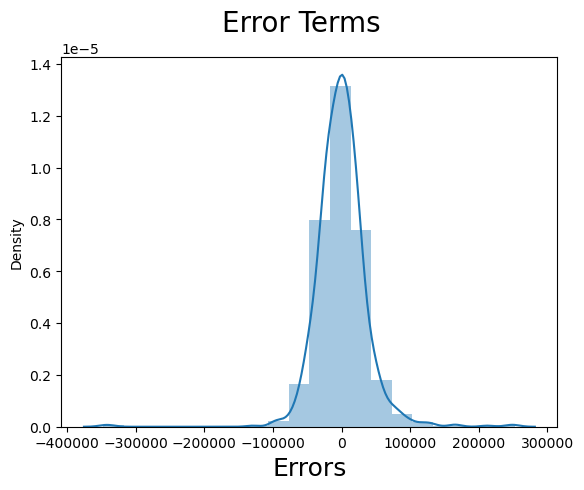

In [621]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnst), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Distribution of error terms is almost Normal and acceptable. Now let us check R2 score of  train data


In [622]:
#evalate model
r2 = r2_score(y_true = y_train,y_pred = y_train_cnst)
round(r2,2)

0.77

In [623]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_train - y_train_cnst))
print(rss)
mse = mean_squared_error(y_train, y_train_cnst)
print(mse)
rmse = mse**0.5
print(rmse)

1443817232846.4297
1414120698.184554
37604.79621251197


In [624]:
# Residual analysis
y_res = (y_train - y_train_cnst)
#y_res

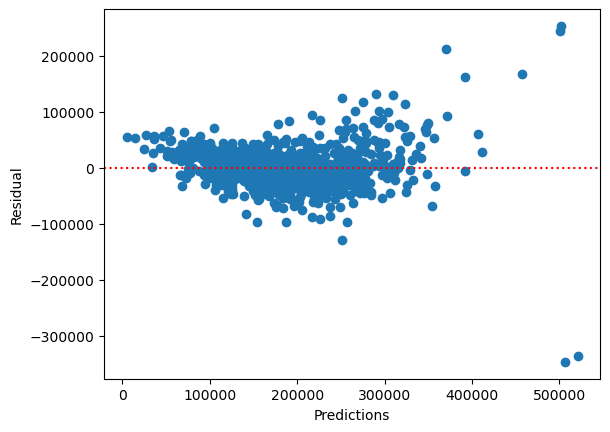

In [625]:
# data['res'] = y_res
plt.scatter( y_train_cnst , y_res)
plt.axhline(y=0, color='r', linestyle=':')
plt.xlabel("Predictions")
plt.ylabel("Residual")
plt.show()

### Prediction and Evalution on Test Data

In [626]:
#scale Test set
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
1436,-0.433386,-0.144614,-1.496155,0.384025,-0.679020,-0.558025,-0.699764,-0.533302,-0.653302,0.665348,...,0,0,0,0,0,1,0,0,0,1
57,0.880036,0.112107,0.648310,-0.532073,0.923321,-0.558025,1.051361,0.577925,-0.653302,-1.226909,...,0,1,0,0,0,0,0,0,1,0
780,-0.297515,-0.253806,0.648310,-0.532073,0.534875,-0.355087,-0.699764,0.577925,-0.653302,-1.226909,...,0,1,0,0,0,0,0,0,0,0
382,0.427132,-0.120835,0.648310,-0.532073,1.020432,-0.558025,1.051361,0.577925,1.236276,-1.226909,...,0,1,0,0,0,0,0,0,1,0
1170,0.291260,-0.059203,-0.066511,0.384025,-0.387685,-0.558025,-0.699764,-0.533302,1.236276,0.665348,...,0,1,0,0,0,0,0,0,0,0


In [627]:
df_test.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,...,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NA,GarageFinish_NA,GarageFinish_RFn,GarageFinish_Unf
count,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,...,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000,439.000000
mean,0.044381,0.008671,0.014903,-0.016637,-0.019148,-0.024379,-0.021652,0.033702,-0.110963,-0.074960,...,0.002278,0.610478,0.015945,0.052392,0.004556,0.255125,0.054670,0.054670,0.314351,0.398633
std,0.991429,0.891711,0.961406,1.063263,1.008023,0.878475,1.018493,0.909956,0.933225,0.988361,...,0.047727,0.488198,0.125407,0.223070,0.067420,0.436429,0.227594,0.227594,0.464786,0.490176
min,-2.199712,-0.891969,-3.640619,-3.280366,-1.698692,-0.558025,-2.450888,-3.866981,-0.653302,-1.699973,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.433386,-0.267006,-0.781333,-0.532073,-0.921799,-0.558025,-0.699764,-0.533302,-0.653302,-1.226909,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.025773,-0.108217,-0.066511,-0.532073,0.389207,-0.558025,-0.699764,0.577925,-0.653302,0.192284,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.472422,0.117445,0.648310,0.384025,0.923321,0.371218,1.051361,0.577925,0.291487,1.138412,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,11.025086,14.414233,2.792775,3.132319,1.214656,4.360551,2.802485,1.689151,2.181065,1.138412,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [628]:
#create y_test and X_test
y_test = df_test.pop('SalePrice')
X_test = df_test

In [629]:

#drop the const
X_train_new = X_train_new.drop(['const'], axis=1)

#trained model columns
col1 = X_train_new.columns
col1


Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'MSSubClass_120',
       'MSSubClass_160', 'LotShape_IR3', 'HouseStyle_1Story',
       'Exterior1st_Stucco', 'GarageFinish_NA'],
      dtype='object')

In [630]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[col1]
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)



In [631]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [632]:
#evalate model
r2 = r2_score(y_true = y_test,y_pred = y_pred)
round(r2,2)

0.78

In [633]:
#Residual Sum of Squares = Mean_Squared_Error * Total number of datapoints
rss = np.sum(np.square(y_test - y_pred))
print(rss)
mse = mean_squared_error(y_test, y_pred)
print(mse)
rmse = mse**0.5
print(rmse)

635654463719.0121
1447960054.0296402
38052.07029886337


In [634]:
y_pred_train = lm.predict(X_train_lm)
# y_pred_test = test_lm.predict(X_test_new)
y_pred_test = y_pred

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.7737621909679266
0.7750473127488947
1443817232846.4297
635654463719.0121
1414120698.184554
1447960054.0296402


In [635]:
print(X_train_new.columns)
print(X_test_new.columns)

X_test_new = X_test_new.drop(['const'], axis=1)

Index(['OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF', 'MSSubClass_120',
       'MSSubClass_160', 'LotShape_IR3', 'HouseStyle_1Story',
       'Exterior1st_Stucco', 'GarageFinish_NA'],
      dtype='object')
Index(['const', 'OverallQual', 'BsmtExposure', '1stFlrSF', '2ndFlrSF',
       'MSSubClass_120', 'MSSubClass_160', 'LotShape_IR3', 'HouseStyle_1Story',
       'Exterior1st_Stucco', 'GarageFinish_NA'],
      dtype='object')


## Ridge Regression

In [636]:
# list of alphas to tune


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [637]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 50}
-19638.1995997689


In [638]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012592,0.010300,0.001898,0.001358,0.0001,{'alpha': 0.0001},-22568.586879,-22775.137765,-22185.079277,-20039.164230,...,-21762.774728,1009.013403,26,-18185.303525,-14981.309092,-17349.824088,-18336.458854,-17724.233930,-17315.425898,1217.834462
1,0.004760,0.005858,0.003724,0.006062,0.001,{'alpha': 0.001},-22557.065311,-22770.228713,-22183.159091,-20036.486649,...,-21757.665592,1007.409351,25,-18183.786915,-14980.783567,-17349.156800,-18336.169334,-17723.672630,-17314.713849,1217.729318
2,0.011907,0.006137,0.000802,0.001604,0.01,{'alpha': 0.01},-22474.769171,-22727.182888,-22164.286583,-20011.107152,...,-21717.480801,996.173489,24,-18173.619147,-14976.200767,-17344.546267,-18333.578296,-17718.442248,-17309.277345,1217.225149
3,0.003142,0.006285,0.006257,0.007664,0.05,{'alpha': 0.05},-22311.910102,-22609.096381,-22095.252183,-19917.574403,...,-21609.827440,983.399136,23,-18158.654379,-14966.450219,-17358.496133,-18335.727702,-17708.030531,-17305.471793,1218.625029
4,0.002902,0.005803,0.006250,0.007655,0.1,{'alpha': 0.1},-22191.041662,-22528.546071,-22018.944123,-19829.428262,...,-21517.016955,982.576129,22,-18152.049279,-14975.852719,-17367.131500,-18336.933453,-17711.302441,-17308.653878,1214.593054
5,0.004626,0.006221,0.003125,0.006249,0.2,{'alpha': 0.2},-22026.863803,-22441.805558,-21910.841718,-19721.915993,...,-21398.415898,981.291461,21,-18148.056323,-14989.439610,-17374.862625,-18332.706336,-17717.106197,-17312.434218,1208.567761
6,0.004827,0.006326,0.003125,0.006250,0.3,{'alpha': 0.3},-21896.373254,-22401.259916,-21852.247783,-19617.348239,...,-21311.842275,996.203788,20,-18150.027935,-14996.516014,-17378.562162,-18324.866180,-17721.543432,-17314.303145,1205.137721
7,0.006249,0.007653,0.005826,0.007167,0.4,{'alpha': 0.4},-21782.544469,-22367.218989,-21798.959993,-19523.066448,...,-21236.067890,1010.706339,19,-18151.748697,-15001.699605,-17379.541636,-18317.516033,-17723.150072,-17314.731209,1202.272618
8,0.006251,0.007655,0.000000,0.000000,0.5,{'alpha': 0.5},-21681.677671,-22335.055645,-21757.670595,-19436.253346,...,-21169.114839,1025.349975,18,-18152.256806,-15007.051724,-17377.385977,-18310.444613,-17724.688612,-17314.365546,1199.188804
9,0.006249,0.007654,0.000000,0.000000,0.6,{'alpha': 0.6},-21589.049982,-22304.808723,-21724.733615,-19357.176028,...,-21109.415946,1038.992761,17,-18151.202458,-15011.219717,-17374.033538,-18302.872140,-17724.005999,-17312.666770,1196.099758


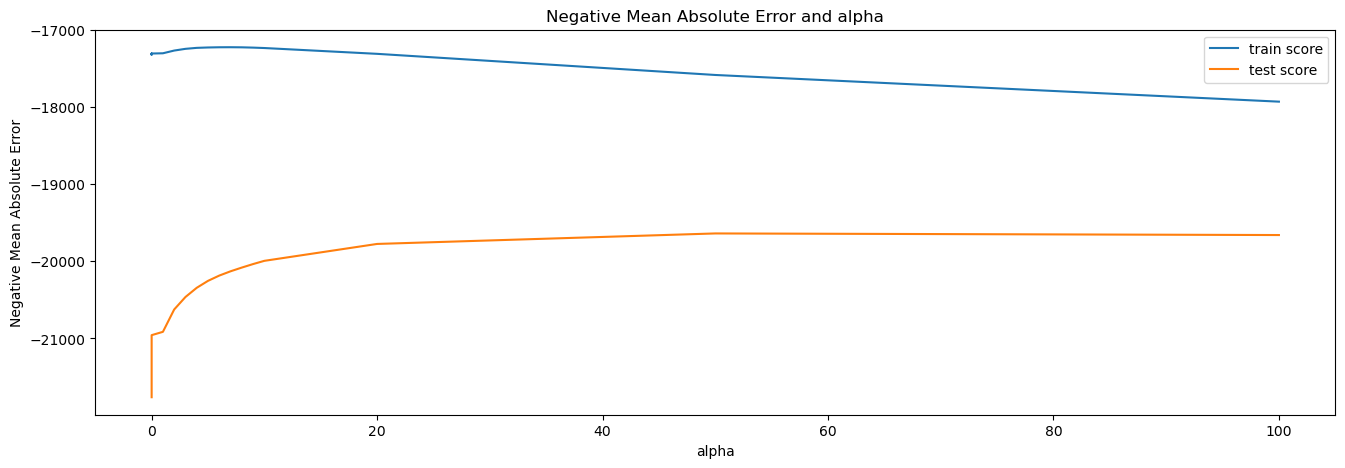

In [639]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [640]:
#final ridge model
alpha = 50
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-4.21112941e+02,  3.55909462e+03,  1.51627521e+04,  4.49436371e+03,
        3.42922704e+02,  5.69815133e+03,  5.17305440e+03,  4.20164829e+03,
        7.60542025e+03,  2.95464286e+03,  4.70307927e+02, -4.82732612e+02,
       -2.39836962e+02,  6.24037566e+01,  3.76051179e+02,  7.28892738e+03,
        9.34949040e+03, -1.11663600e+03,  1.30076262e+04,  3.78057906e+03,
        6.10131555e+02,  3.24220823e+03,  1.89995799e+03, -1.19124124e+03,
       -4.04612708e+03,  6.28108527e+03,  3.92450104e+03,  2.93268712e+03,
       -3.23637028e+03,  8.03288337e+03,  2.13000460e+03,  1.55228725e+03,
       -6.99015749e+02,  3.30619386e+02,  1.59868511e+03,  1.30868044e+03,
       -6.73078732e+02,  6.54172458e+01, -2.06447537e+02, -2.87335181e+03,
       -6.97682349e+02, -3.99895194e+00,  5.29125444e+02,  1.89787113e+03,
        9.70450754e+02,  3.73888132e+02, -2.12047311e+02, -1.95368713e+03,
       -8.61692373e+02, -7.01948436e+02, -9.33025743e+03, -7.46884466e+03,
       -9.44967821e+02, -

In [641]:
#lets predict the R-squared value 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import metrics
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8557590932805794


In [642]:
# Prediction on test set
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8547730354694919


In [643]:
# Printing the RMSE value
mean_squared_error(y_test, y_test_pred)

934786981.1104999

# LASSO REGRESSION

In [644]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [645]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)

In [646]:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 5e-05}
-21703.74092118565


In [647]:
#final lasso model
alpha = 5e-05

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=5e-05)

In [648]:
#Predict the R-squared value for Train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.8763060234552302


In [649]:
#Predict the R-squared value for test data

y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.847552818941254


In [650]:
mean_squared_error(y_test, y_test_pred)

981261576.4669139

In [651]:
lasso.coef_

array([-3.05211399e+03,  4.66159051e+03,  1.40857939e+04,  4.15021794e+03,
        6.21271429e+02,  3.18336885e+03,  3.05898094e+03,  7.03685739e+03,
        8.92660964e+03,  2.67044456e+03,  1.93701553e+01, -8.25056158e+02,
       -6.05603321e+02, -3.81124845e+02,  2.97037741e+02,  1.39077894e+04,
        2.95390575e+04,  1.36505676e+03,  4.32191052e+03,  4.48820567e+03,
        1.71724677e+03,  3.29808175e+03,  1.82059205e+03, -3.03691297e+03,
       -3.02303933e+03,  5.24139885e+03,  2.99244824e+03,  2.17170264e+03,
        2.40135309e+03,  1.01290582e+04, -1.44313393e+03,  1.23391816e+03,
       -5.05841135e+02,  4.25721946e+02,  1.97659657e+03,  1.56313352e+03,
       -5.47972986e+02,  1.64154942e+02, -5.31052624e+02, -1.44265288e+03,
       -5.41453265e+03, -1.14539553e+04, -2.53408296e+04,  1.10116559e+04,
       -7.13683215e+02, -6.62256948e+01,  1.28040433e+04, -1.71780006e+03,
        1.33604377e+03, -9.20298184e+03, -3.43723214e+04, -2.98081341e+04,
       -3.35799693e+04, -

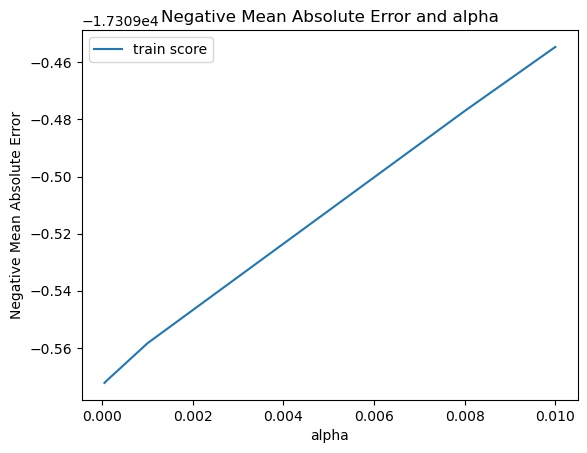

In [652]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [653]:
model_cv.best_params_

{'alpha': 50}

In [654]:
ridge = Ridge(alpha = 50)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.8557590932805794
0.8547730354694919


Best alpha value for Lasso : {'alpha': 5e-05}
Best alpha value for Ridge : {'alpha': 50}

In [655]:
ridge = Ridge(alpha = 50)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))


0.8557590932805794
0.8547730354694919


In [656]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coef']

In [657]:
ridge_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,LotFrontage,173845.369790
3,OverallCond,15162.752070
19,BsmtFullBath,13007.626176
80,Neighborhood_NridgHt,11601.922736
104,Neighborhood_NridgHt,11601.922736
115,HouseStyle_2.5Fin,11121.504270
81,Neighborhood_OldTown,10228.203775
105,Neighborhood_OldTown,10228.203775
17,LowQualFinSF,9349.490400
30,GarageArea,8032.883374


In [658]:
lasso = Lasso(alpha=5e-05)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8763060234552302
0.847552818941254


In [659]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

,Feaure,Coef
0,LotFrontage,88709.683241
146,Exterior2nd_MetalSd,59205.299355
81,Neighborhood_OldTown,56117.262152
144,Exterior2nd_HdBoard,54748.058601
80,Neighborhood_NridgHt,47199.651364
114,HouseStyle_1Story,44668.728144
87,Neighborhood_Timber,38554.535014
168,GarageFinish_NA,38537.633156
115,HouseStyle_2.5Fin,37899.005456
150,Exterior2nd_Stucco,34807.132369


#### Thus, we can go with the Lasso model as it gives a very good adj R square score on test data.  Our final model would have the following coefficients 
- LotFrontage	88709.683241
- Exterior2nd_MetalSd	59205.299355
- Neighborhood_OldTown	56117.262152
- Exterior2nd_HdBoard	54748.058601
- Neighborhood_NridgHt	47199.651364
- HouseStyle_1Story	44668.728144
- Neighborhood_Timber	38554.535014
- GarageFinish_NA	38537.633156
- HouseStyle_2.5Fin	37899.005456
- Exterior2nd_Stucco	34807.132369


In [540]:
# Let us now check what will happen when we double the value of Alpha for both Ridge and Lasso


In [541]:
ridge = Ridge(alpha = 100) #50*2
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))


0.8462110905392849
0.8519772290238061


In [543]:
lasso = Lasso(alpha=(5e-05)*2)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.8763060234221611
0.8475608527014208
